# Logistic Regression on Student Data

## Data Preprocessing

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [2]:
df = pd.read_excel('Full_Data.xlsx')

#Selecting Student Data
sdf = df[df['STU_NON'] == "STU"]

In [3]:
sdf.describe()

,AGE,GUIDANCE,FAMILY_SCORE,PEER_SCORE,PERSONAL_INVESTMENT_SCORE,INV_GUIDE_EXPERTS,EMERG_FUND,GEN_PER_FIN_SCORE,SAV_SCORE,INSUR_SCORE,INV_SCORE,TOTAL_SCORE,PERCENT_SCORE
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,20.330508,0.330508,12.127119,10.211864,3.533898,0.347458,0.601695,3.932203,5.211864,1.703390,2.576271,13.423729,0.536949
std,1.496749,0.472402,6.174869,5.906467,2.319307,0.478193,0.491637,1.412574,1.875855,1.015347,1.081363,3.738016,0.149521
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.160000
25%,19.250000,0.000000,8.000000,6.000000,2.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,11.000000,0.440000
50%,20.000000,0.000000,12.000000,10.000000,3.000000,0.000000,1.000000,4.000000,5.000000,2.000000,3.000000,14.000000,0.560000
75%,21.000000,1.000000,16.750000,13.750000,5.000000,1.000000,1.000000,5.000000,6.750000,2.000000,3.000000,16.000000,0.640000
max,27.000000,1.000000,24.000000,24.000000,12.000000,1.000000,1.000000,6.000000,9.000000,4.000000,5.000000,22.000000,0.880000


Features : {Family Score, Peer Score, Personal Investment Score}

Label : {1 = high - Percent Score>Median(Percent Score); 0 = low - Percent Score>Median(Percent Score)}

In [4]:
sdf['LabelPercentScore'] = np.where(sdf.PERCENT_SCORE >= 0.56, 1, 0)

C:\Users\Insha\AppData\Local\Temp\ipykernel_19980\1829190497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['LabelPercentScore'] = np.where(sdf.PERCENT_SCORE >= 0.56, 1, 0)


In [5]:
#Create Logistic Regression dataframe
log_df = sdf[['FAMILY_SCORE','PEER_SCORE','PERSONAL_INVESTMENT_SCORE','LabelPercentScore']]

In [6]:
X = log_df.iloc[:, :-1].values
y = log_df.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 4)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=4)

### Create a confusion matrix and getting the accuracy score

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[ 4  3]
 [ 1 16]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.84      0.94      0.89        17

    accuracy                           0.83        24
   macro avg       0.82      0.76      0.78        24
weighted avg       0.83      0.83      0.82        24



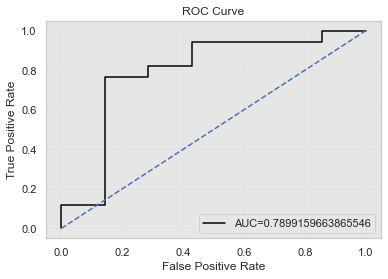

In [11]:
#ROC CURVE

y_pred_proba = classifier.predict_proba(X_test)[:,-1]
deg_line = np.linspace(start = 0.0, stop = 1.0)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

sns.set_theme(style = "whitegrid", rc= {"axes.facecolor": ".9",'grid.linewidth': 0.1})
plt.plot(fpr,tpr, color = "black", label="AUC="+str(auc))
plt.plot(deg_line, deg_line, linestyle = '--')
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()